# **Hack the Markets Group Challenge (Femhack 2022)**
#### **Category**: Data Science
#### **Members**: Miruna Andreea Gheata
#### **Date**: 23/01/2022

***

# **Table of contents**

[1. Introduction to the challenge](#intro)   


***

# **1. Introduction to the challenge**<a class="anchor" id="intro"></a>

The challenge definition can be found @[Nuwe](https://nuwe.io/challenge/hack-the-markets-predictive-modelling).

<img src="img/femhack.jpeg">

## **1.1. Background**

To improve the European central bank's decision making, Christine Lagarde would need to have some certainty about future currency market dynamics, in particular, one of the ones she is most concerned about is the EUR/GBP pair. Therefore, they need your team to create a small predictive model for them to know if the value of the Euro will rise or fall against the British pound a month in advance.

## **1.2. Dataset**
A dataset of historical information on the EURO-LIBRA pair is provided. A currency pair is the dyadic quotation of the relative value of a currency unit against the unit of another currency in the foreign exchange market. For example: EURGBP = 0,9 means that 1 EURO has a value of 0,9 GBP. Historical prices in the dataset goes from January 3rd 2000 to Octobre 29th 2019. The information is given on a weekly timeframe, i.e. each row of the dataset corresponds to 1 week. The dataset contains **8 predictor variables**. The predictive variables of the dataset are:

```Open```: Price of the pair at the beginning of the day.

```High```: Maximum price that the pair reaches during the week.

```Low```: Minimum price that the pair reaches during the week.

```Close```: Price of the pair at the end of the week.

```rsi```: Relative Strength Index, is an indicator that is often used in technical analysis and shows the strength of the price.

```ema_fast```: Exponential Moving Average taking the average value of 14 weeks.

```ema_slow```: Exponential Moving Average taking the average value of 42 weeks.

The moving averages are usually used to detect trends in the markets, when the fast moving average (```ema_fast```) exceeds the slow moving average (```ema_slow```) indicates the beginning of an uptrend.

```volatility```: Volatility is a measure of the intensity of changes in the price of an asset. In this case the volatility has been obtained from the NATR (Normalized Average True Range).


**Target**:

```target```: The target is defined by two values, 1 or 0. If target is 1 means that in the next month, the closing price of the EURGDP pair will be higher than this week's closing price. If target is 0 means that in the next month, the closing price of the EURGDP pair will be lower than this week's closing price.

## **1.3. Tasks**

1. Generate a predictive classification model (you can use any type of algorithm) that allows you to predict the ‘target’ of the dataset. Train your model with the train dataset, and once you find the model that maximizes the f1-score(macro), input the data from the test_x dataset into your algorithm to get the predictions of your algorithm.

In [14]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv("train.csv")
train

,Date,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility,target
0,2000-01-03,0.62810,0.63300,0.62350,0.62720,NaN,NaN,NaN,NaN,0
1,2000-01-10,0.62710,0.62900,0.61810,0.61970,NaN,NaN,NaN,NaN,0
2,2000-01-17,0.62000,0.62250,0.60720,0.60900,NaN,NaN,NaN,NaN,1
3,2000-01-24,0.60910,0.61271,0.59900,0.60270,NaN,NaN,NaN,NaN,1
4,2000-01-31,0.60210,0.62670,0.59800,0.61580,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1030,2019-09-30,0.89002,0.89365,0.88333,0.88779,47.151897,0.895761,0.889108,1.564625,0
1031,2019-10-07,0.89050,0.90183,0.86835,0.86835,37.551961,0.892106,0.888143,1.760791,0
1032,2019-10-14,0.87443,0.88081,0.85808,0.86451,35.993098,0.888426,0.887044,1.830085,0
1033,2019-10-21,0.86453,0.86687,0.85770,0.86380,35.698024,0.885143,0.885962,1.776589,0


In [6]:
train.describe()

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility,target
count,1035.000000,1035.000000,1035.000000,1035.000000,1021.000000,1022.000000,994.000000,1021.000000,1035.000000
mean,0.766462,0.775037,0.758744,0.766788,51.264480,0.767037,0.767578,2.155019,0.503382
std,0.099069,0.109941,0.101508,0.099102,10.268314,0.097296,0.093424,1.480081,0.500230
min,0.578300,0.587600,0.006600,0.578400,19.171099,0.598982,0.607234,1.006340,0.000000
25%,0.679100,0.684500,0.674500,0.679100,44.383073,0.680563,0.682325,1.467247,0.000000
50%,0.787900,0.794610,0.781000,0.787800,50.741770,0.789053,0.783807,1.840244,1.000000
75%,0.859930,0.867000,0.851450,0.861200,57.693333,0.859042,0.856121,2.235330,1.000000
max,0.961400,2.233500,0.943800,0.961600,79.522395,0.903959,0.889572,17.421381,1.000000


In [7]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
def na_count(df):
    '''
    Counts the total number of null records of each column in the df.
    :param df: dataframe to examine. 
    '''
    print('Feature   Number of NaN')
    print(df.isnull().sum().sort_values(ascending=True))#.loc[lambda x : x!=0])

In [8]:
na_count(train)

Feature   Number of NaN
Date           0
Open           0
High           0
Low            0
Close          0
target         0
ema_fast      13
rsi           14
volatility    14
ema_slow      41
dtype: int64


In [9]:
train = train.dropna()

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 41 to 1034
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        994 non-null    object 
 1   Open        994 non-null    float64
 2   High        994 non-null    float64
 3   Low         994 non-null    float64
 4   Close       994 non-null    float64
 5   rsi         994 non-null    float64
 6   ema_fast    994 non-null    float64
 7   ema_slow    994 non-null    float64
 8   volatility  994 non-null    float64
 9   target      994 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 85.4+ KB


In [44]:
train['target'].value_counts()

1    507
0    487
Name: target, dtype: int64

In [45]:
train.drop(columns=['target']).corrwith(train['target'])

Open         -0.104824
High         -0.081774
Low          -0.113715
Close        -0.108738
rsi          -0.046545
ema_fast     -0.097900
ema_slow     -0.090974
volatility    0.021214
dtype: float64

In [11]:
y_train = train['target']
X_train = train.loc[:, train.columns != 'target']

In [ ]:
train

<AxesSubplot:>

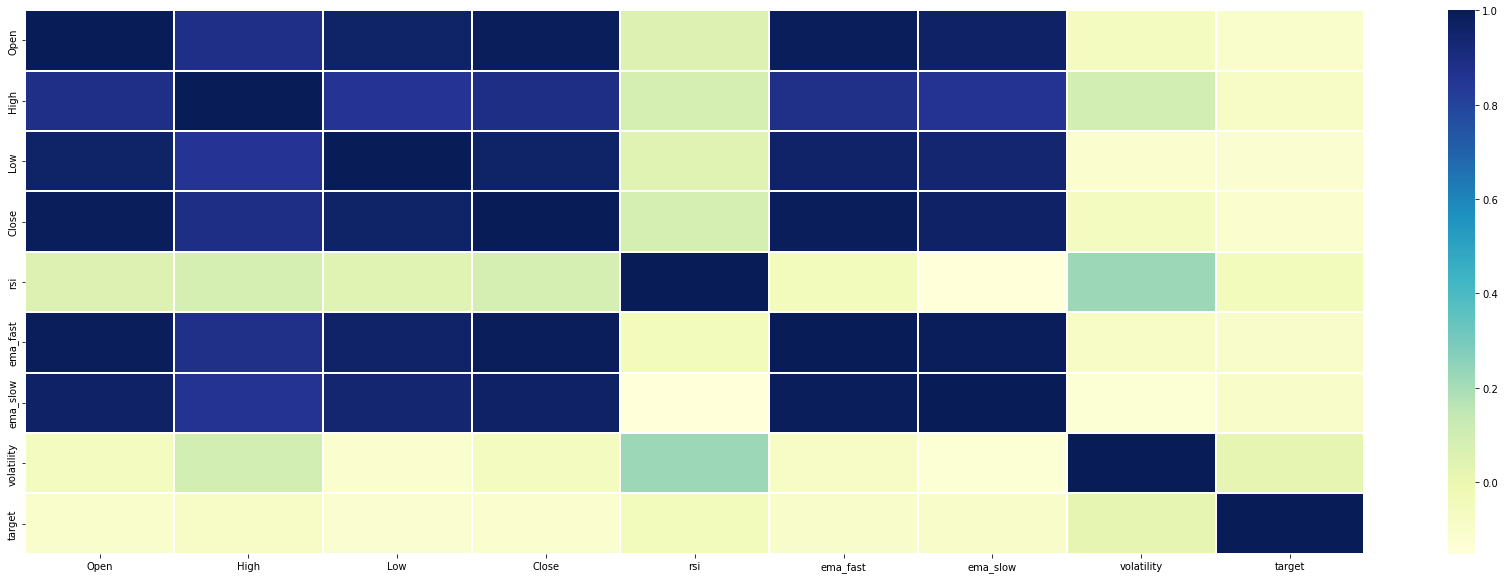

In [15]:
corrmat = train.corr()

f, ax = plt.subplots(figsize=(30, 10))

sns.heatmap(corrmat, ax=ax, cmap='YlGnBu', linewidth=0.1)

Open         -0.104824
High         -0.081774
Low          -0.113715
Close        -0.108738
rsi          -0.046545
ema_fast     -0.097900
ema_slow     -0.090974
volatility    0.021214
dtype: float64

In [48]:
for feature in X_train.columns:
    plt.scatter(X_train[feature], hue=y_train)
    plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

(array([487.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 507.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

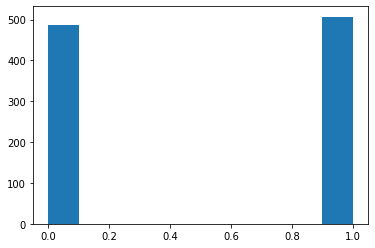

In [49]:
plt.hist(train['target'])

In [52]:
percentages = (train['target'] / train['target'].sum()) * 100

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie([])